In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [27]:
dataset = pd.read_csv("ChennaiHousePrice.csv")

dataset = dataset.fillna(value = {"price":np.mean(dataset['price']),"area":np.mean(dataset['area']),"bathroom":int(np.mean(dataset['bathroom'])),"age":int(np.mean(dataset['age']))})

X_Train , X_Test , Y_Train , Y_Test = train_test_split(dataset.iloc[:,1],dataset.iloc[:,0],test_size=0.2,random_state=42)

In [28]:
X_Train_Sq = X_Train * X_Train
X_Y_Train = X_Train * Y_Train

X_Train_Sum = np.sum(X_Train)
Y_Train_Sum = np.sum(Y_Train)
X_Y_Train_Sum = np.sum(X_Y_Train)
X_Train_Sq_Sum = np.sum(X_Train_Sq)

Intercept = ((Y_Train_Sum * X_Train_Sq_Sum)-(X_Train_Sum * X_Y_Train_Sum))/((len(X_Train)*X_Train_Sq_Sum)-((X_Train_Sum)**2))
Slope = ((len(X_Train)*X_Y_Train_Sum)-(X_Train_Sum * Y_Train_Sum))/((len(X_Train)*X_Train_Sq_Sum)-((X_Train_Sum)**2))

print(Intercept, Slope)

-82.72594741300064 0.1379853025873647


R2_Score:  0.6461420227151835


<function matplotlib.pyplot.show(close=None, block=None)>

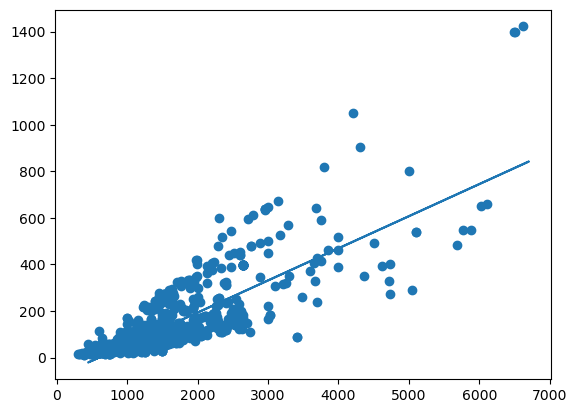

In [35]:
Predict = Intercept + (Slope * X_Test)

from sklearn.metrics import r2_score

print("R2_Score: ",r2_score(Y_Test,Predict))

plt.plot(X_Test , Predict)
plt.scatter(X_Train , Y_Train)
plt.show